In [2]:
#imports and preamble
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#read data
house_prices = pd.read_csv("house_prices.csv")
sqm = house_prices[["size(sqm)"]]
prices = house_prices[["price"]]

In [22]:
#Create linear regression model
linear_regression_model = LinearRegression().fit(sqm,prices)


In [23]:
#read coef and intercept of model
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)


[[15780.95631313]]
[2691439.76386015]


In [37]:
#Some predictions
print("Prediction for 100sqm: ",linear_regression_model.predict([[100]]))
print("Prediction for 150sqm: ",linear_regression_model.predict([[150]]))
print("Prediction for 200sqm: ",linear_regression_model.predict([[200]]))

Prediction for 100sqm:  [[4269535.39517298]]
Prediction for 150sqm:  [[5058583.2108294]]
Prediction for 200sqm:  [[5847631.02648582]]


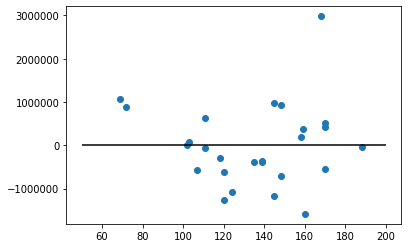

In [36]:
#Linear Regression residual plot
plt.scatter(sqm,linear_regression_model.predict(sqm) - prices)
plt.hlines(y=0, xmin=50, xmax=200)